# Explore and Model

### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import Data

In [2]:
# setting to view all columns
pd.set_option('display.max_columns', 999)

# opening saved data from pickle file
# The protocol version used is detected automatically, so we do not
# have to specify it.
with open('data/df-os.pickle', 'rb') as f:
    df_2 = pickle.load(f)

display(df_2.shape)
df_2.head()

(39644, 61)

,timedelta,n_title,n_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,nhrefs,nself_hrefs,nimgs,nvideos,avg_token_length,nkeywords,channel_lifestyle,channel_ent,channel_bus,channel_socmed,channel_tech,channel_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_ref_min_shares,self_ref_max_shares,self_ref_avg_shares,week_mon,week_tues,week_wednes,week_thurs,week_fri,week_satur,week_sun,weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subj,global_sentiment_pol,global_rate_pos_words,global_rate_neg_words,rate_pos_words,rate_neg_words,avg_pos_pol,min_pos_pol,max_pos_pol,avg_neg_pol,min_neg_pol,max_neg_pol,title_subj,title_sentiment_pol,abs_title_subj,abs_title_sentiment_pol,shares,Shares_plus
url,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
http://mashable.com/2013/01/07/amazon-instant-video-browser/,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0
http://mashable.com/2013/01/07/apple-40-billion-app-downloads/,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1
http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0


> To proceed:
* Visualize data
* To scale or not to scale
* Build a Decision Tree classifier, to set a modeling baseline
* Examine the relative importance of dataset features
* Test, tune, and score ensemble method models against the dataset
* Compare the model scores to determine which model is most effective

In addition, depending on time allowance and feature relative importance, I may repeat tests without features such as best and worst keywords, LDA, and polarity, as they may require additional unpacking beyond our current scope.

### Plot Class Counts

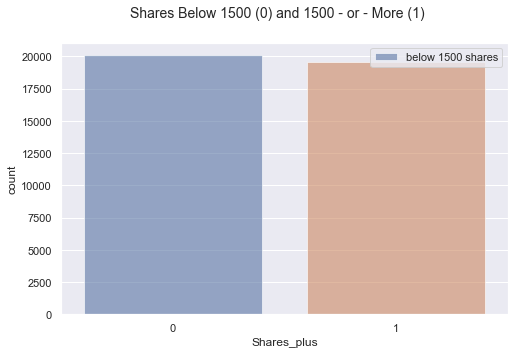

In [3]:
# styling the figure
sns.set(style="darkgrid")
plt.figure(figsize=(8, 5))

# titling and labeling
plt.suptitle("Shares Below 1500 (0) and 1500 - or - More (1)", fontsize=14)
plt.ylabel("count")

#plotting
ax = sns.countplot(x="Shares_plus",alpha=.6, data=df_2);

# adding legend
plt.legend(labels=('below 1500 shares', '1500 and above'))
plt.show()

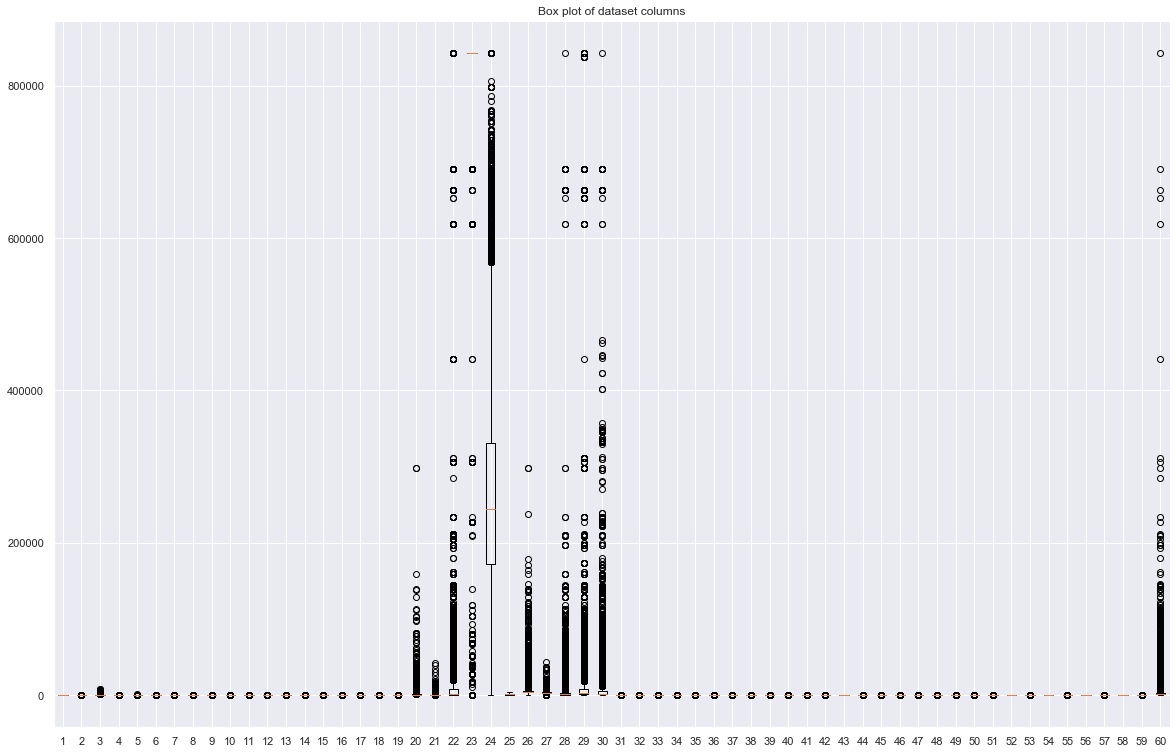

In [4]:
# Create a box plot of each column
plt.figure(figsize=(20, 13))
plt.boxplot([df_2[col] for col in df_2.iloc[:, 0:60].columns])

plt.title("Box plot of dataset columns")
#plt.xticks(range(len(df_2.columns.values)), df_2.columns.values)
plt.show()


> We see a significant range in scale for data in this set; however, scaling is not required for Decision Tree models, which is what we will be using to set a modeling baseline.

## Build a Base Model

#### Import Required Libraries

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

#### Split Outcome Variables and Target

In [6]:
# spliting the dataframe outcome and predictor variables
X = df_2.drop(['shares', 'Shares_plus'], axis=1) # features
y = df_2['Shares_plus'] # target

# splitting the dataset into 80/20 training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state = 0
                                                   )

#### Buid a Decision Tree

In [7]:
# instantiate and fit a Decision Tree classifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Feature Importance

In [8]:
# checking feature importances of the trained model
tree_clf.feature_importances_

array([0.06668088, 0.        , 0.        , 0.03397857, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00576391, 0.10550961, 0.        ,
       0.07508385, 0.09589684, 0.01117742, 0.        , 0.        ,
       0.00409296, 0.        , 0.        , 0.        , 0.        ,
       0.01493452, 0.3258526 , 0.11303927, 0.        , 0.00380801,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.09888608, 0.00688671, 0.00954792,
       0.01868913, 0.        , 0.        , 0.        , 0.        ,
       0.00324808, 0.        , 0.00232904, 0.        , 0.00270122,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00189338])

#### Plot Feature Importances

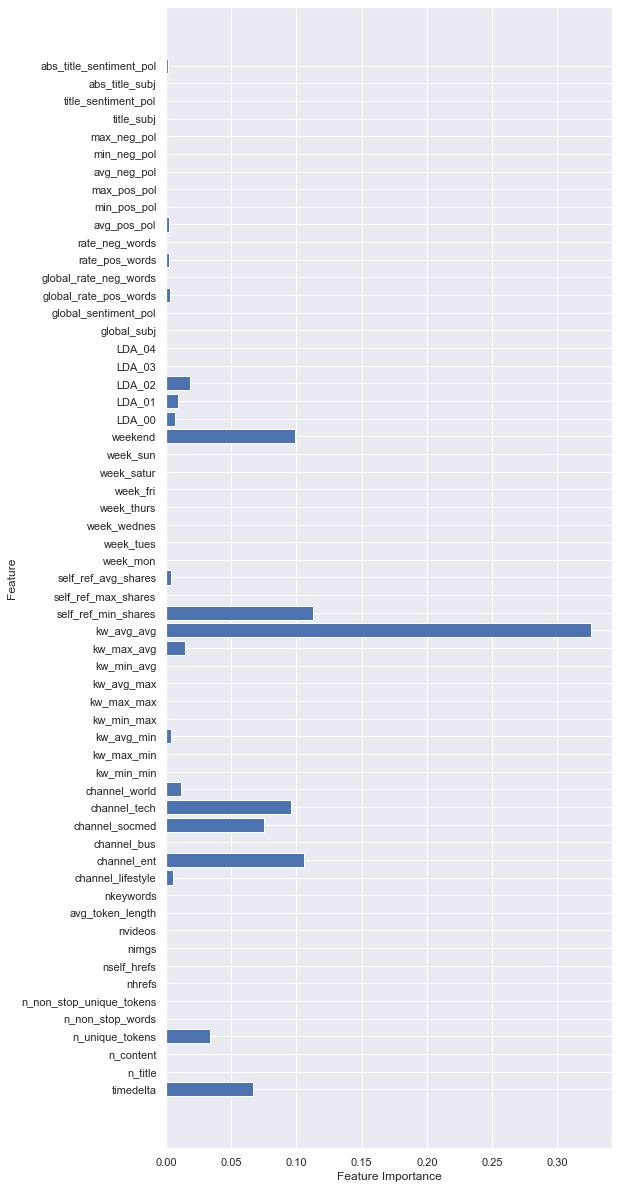

In [9]:
# visualize feature importances
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8, 21))
    plt.barh(range(n_features), 
             model.feature_importances_, 
             align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

#### Model Performance

Along with an scikit-learn classification report, we will view a matrix and heatmap reflecting outcomes for our model, in the following format:

<table>
  <tr>
    <td>True Negative</td>
    <td>False Positive</td>
  </tr>
  <tr>
    <td>False Negative</td>
    <td>True Positive</td>
  </tr>
</table>

In [10]:
# viewing test set predictions
pred = tree_clf.predict(X_test)

# viewing confusion matrix and classification report
print("\n", confusion_matrix(y_test, pred), "\n")
print(classification_report(y_test, pred))


 [[3237 1836]
 [1795 3043]] 

              precision    recall  f1-score   support

           0       0.64      0.64      0.64      5073
           1       0.62      0.63      0.63      4838

    accuracy                           0.63      9911
   macro avg       0.63      0.63      0.63      9911
weighted avg       0.63      0.63      0.63      9911



> Scores appear consistent accross the board, for this model, with precision, recall, and f1-scores all between 0.62 and 0.64, inclusive.

In [11]:
# displaying the model's test set accuracy
print("\nDecision Tree Classifier Testing Accuracy: {:.4}%\n".format(
    accuracy_score(y_test, pred) * 100))


Decision Tree Classifier Testing Accuracy: 63.36%



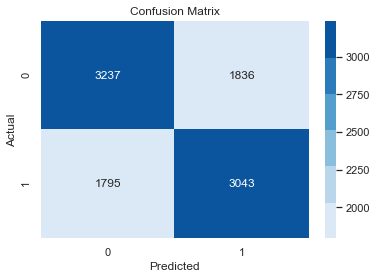

In [12]:
# plotting confusion matrix heatmap
cm = confusion_matrix(y_test, pred)

sns.heatmap(cm, cmap=sns.color_palette('Blues'), annot=True, fmt='0.4g')

plt.autoscale()

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

## Bootstrap Aggregation (Bagging)

Next, we will try a bagged trees ensemble model. Considering the low variance in our original Tree model, we are not likely to be surprised by the bagging scores.

In [13]:
# instantiating a Bagging classifier
bagged_tree = BaggingClassifier(    DecisionTreeClassifier(
    criterion='gini',        max_depth=5    ), n_estimators=20
)

In [14]:
# fit to the training data
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
       

In [15]:
# checking the accuracy of our Training set
print("\nTraining set score: ", 
      bagged_tree.score(X_train, 
                        y_train).round(2))

# checking the accuracy of our Test set
print("Test set score:     ", 
      bagged_tree.score(X_test, 
                        y_test).round(2))


Training set score:  0.66
Test set score:      0.64


> True enough, our bagging scores are in line with scores from our original Tree model.
* Note: when tested with a max depth of 7, the model scores the training set at 0.69 and the test set at 0.65, indicating that the model quicky begins to overfit as we increase depth.

## Random Forest

Another ensemble model is Random Forest. This model allows for lower correlation among samples, by limiting the number of features on which to split.

In [16]:
# instantiating a Random Forest classifier
forest = RandomForestClassifier(n_estimators=100, max_depth=5)

# fit to training data
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
# checking the Training accuracy of our forest
print("\nTraining set score: ", forest.score(X_train, y_train).round(2))

# checking the Test accuracy of our forest
print("Test set score:     ", forest.score(X_test, y_test).round(2))


Training set score:  0.66
Test set score:      0.65


> Our test score nuged upwards, a tiny bit.
* So far, results have not strayed far from our our first - guess tree. 

#### Forest Feature Importance

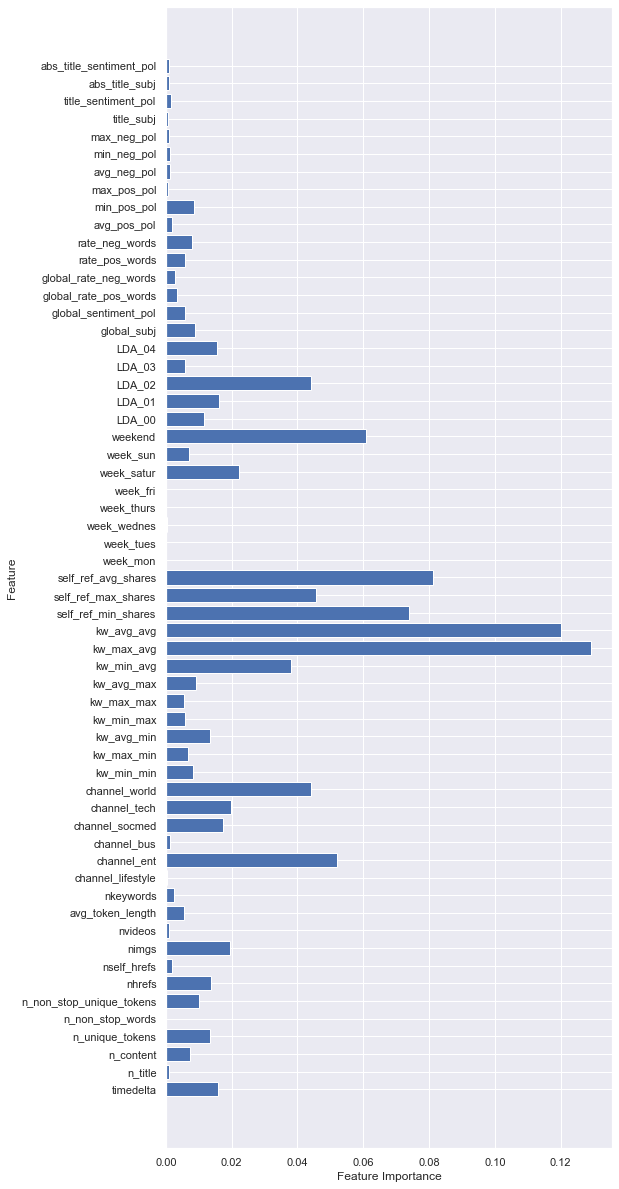

In [18]:
plot_feature_importances(forest)

> While scores have remained close among our models, we can observe from the plot above that feature importances have shifted. For example, where `kw_avg_avg` reached 0.33 and `kw_avg_max` eeked - out only 0.02, in our Tree model, the Random Forest model improtances for the same two features are approximately 0.12 and 0.13, respectively.

So, even if scores were exactly the same, the more balanced RandomForest model would be preferred to the lucky - guess of our original Tree model.

#### 10 - fold mean cross validation our Forest model

In [19]:
# importing necessary library
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings("ignore")

rf_clf = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, 
                                           X_train, 
                                           y_train, 
                                           cv=10))
print(f"\nMean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}\n")


Mean Cross Validation Score for Random Forest Classifier: 62.55%



## GridSearch

Rather than settling for a single set of parameters, we can create a parameter grid dictionary that enables us to test different values for each parameter.

In [20]:
# creating a parameter grid dictionary
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 5, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

We can perform a Grid Search to determine an optimal parameter combination from among the values in our grid dictionary.

In [21]:
# performing a grid search with Random Forest
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)
print(f"Testing Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Testing Accuracy: 66.74%

Optimal Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 100}


> Just when I was beginning to feel confident in our first guess, GridSearch improved our testing accuracy ~ 4.5\% over our 10 - fold mean cross - validation score for Random Forest modeling.
    * GridSearch determined that our model could achieve its most accurate score, by increasing `max_depth` from 5 to 10.
    * Optimal criterion and `n_estimators` were found at their original settings, `gini` and 100.
    * The grid search increased `min_samples_leaf` from 1 to 3, and `min_samples_split` was found to be more effective at 5, rather than our original value of 1.

### Other Algorithms

In addition to the models we have tested, Boosting models (including __AdaBoost__, __Gradient Boost__, and __XGBoost__) offer additional tuning options.

We can create a pipeline that will enable us to plug - in various models. By creating a scaled pipeline we can also, easily incorporate and compare additional models such as __K-Nearest Neighbors__(KNN).

In [ ]:
# 72 Char. screen - width reference
########################################################################

## Save and Continue

In [ ]:
with open('data/#.pickle', 'wb') as f:
    # pickling the dataframe using the highest protocol available
    pickle.dump(#, f, pickle.HIGHEST_PROTOCOL)